<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/BENCHMARK_APT_FIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
pip install ta

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from ta import momentum

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [80]:
IDCdb = pd.read_excel("/content/Actualización Unidad Histórica IDCdB al 12 de Julio 2023.xlsx", sheet_name="Ficha semanal")

In [81]:
FIB = pd.read_excel("/content/Comision FIB.xlsx", sheet_name="Portafolio FIB")

In [82]:
FIB = FIB[["datFechaAct", "ValorUnidad"]]
FIB.columns = ['Fecha', 'Valor de unidad']

In [83]:
FIB['Fecha'] = pd.to_datetime(FIB['Fecha'])

In [84]:
IDCdb = IDCdb.iloc[3:, [14, 17]]
IDCdb.columns = ['Fecha', 'Valor de unidad']

In [85]:
IDCdb['Fecha'] = pd.to_datetime(IDCdb['Fecha'])

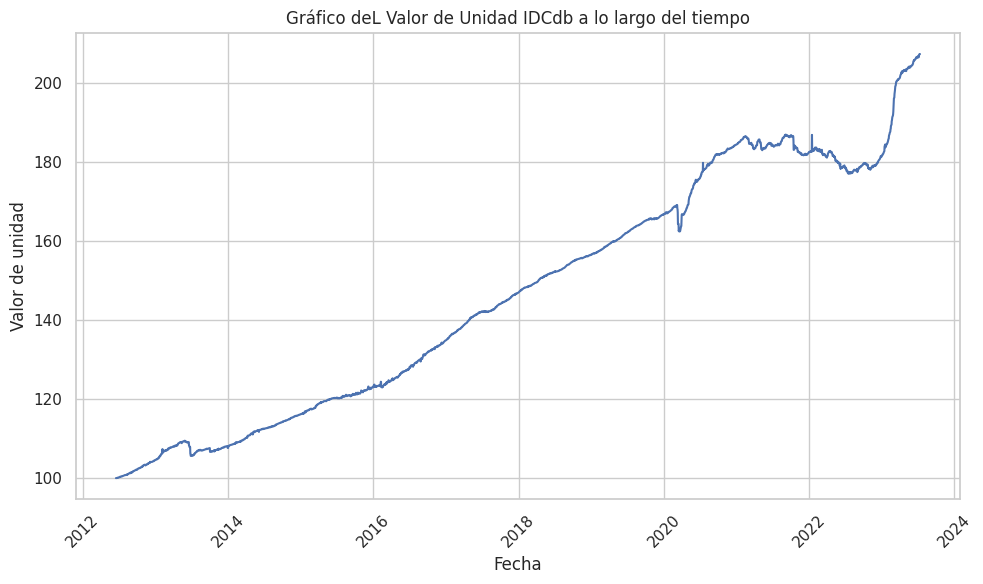

In [86]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(IDCdb['Fecha'], IDCdb['Valor de unidad'])
plt.xlabel('Fecha')
plt.ylabel('Valor de unidad')
plt.title('Gráfico deL Valor de Unidad IDCdb a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

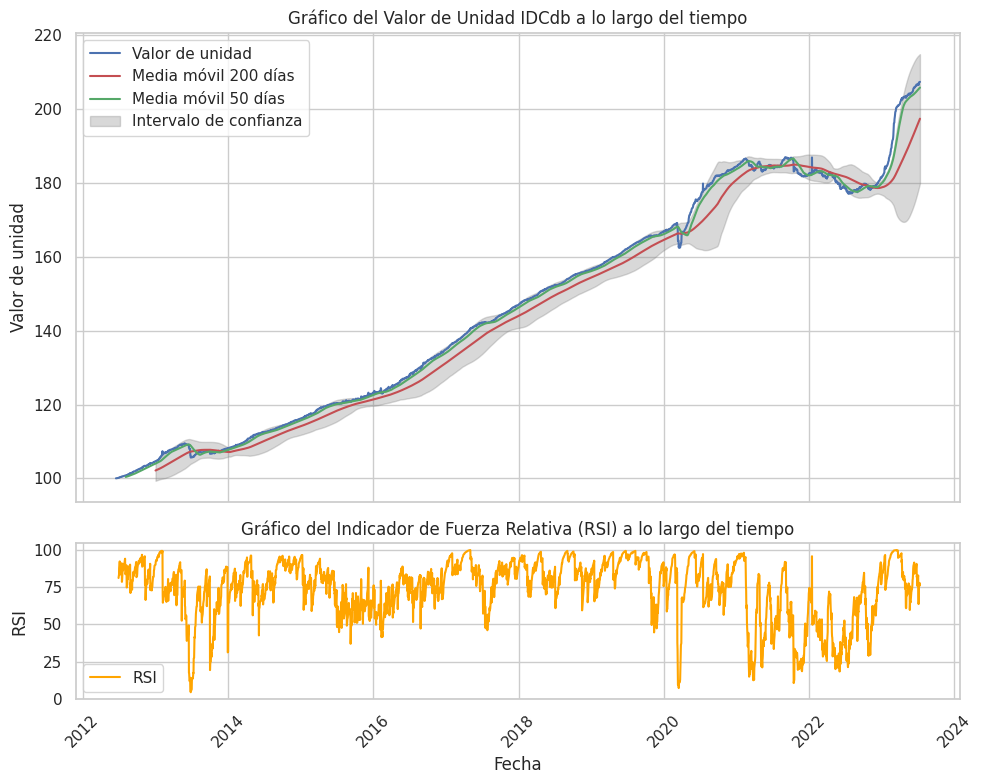

In [103]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")
# Calcular el RSI
dias_rsi = 14
IDCdb['RSI'] = momentum.RSIIndicator(IDCdb['Valor de unidad'], window=dias_rsi).rsi()
# Crear una figura con dos subgráficos, uno más pequeño para el RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
# Gráfico superior (Valor de unidad, medias móviles y intervalos de confianza)
ax1.plot(IDCdb['Fecha'], IDCdb['Valor de unidad'], label='Valor de unidad', color='b')
ax1.plot(IDCdb['Fecha'], IDCdb['Media_movil_200'], label='Media móvil 200 días', color='r')
ax1.plot(IDCdb['Fecha'], IDCdb['Media_movil_50'], label='Media móvil 50 días', color='g')
ax1.fill_between(IDCdb['Fecha'], IDCdb['Intervalo_inf'], IDCdb['Intervalo_sup'], alpha=0.3, color='gray', label='Intervalo de confianza')
ax1.set_ylabel('Valor de unidad')
ax1.set_title('Gráfico del Valor de Unidad IDCdb a lo largo del tiempo')
ax1.legend()
# Gráfico inferior (RSI)
ax2.plot(IDCdb['Fecha'], IDCdb['RSI'], label='RSI', color='orange')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('RSI')
ax2.set_title('Gráfico del Indicador de Fuerza Relativa (RSI) a lo largo del tiempo')
ax2.legend()
# Rotar las etiquetas del eje x para ambos subgráficos
plt.xticks(rotation=45)
# Ajustar los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar la figura
plt.show()

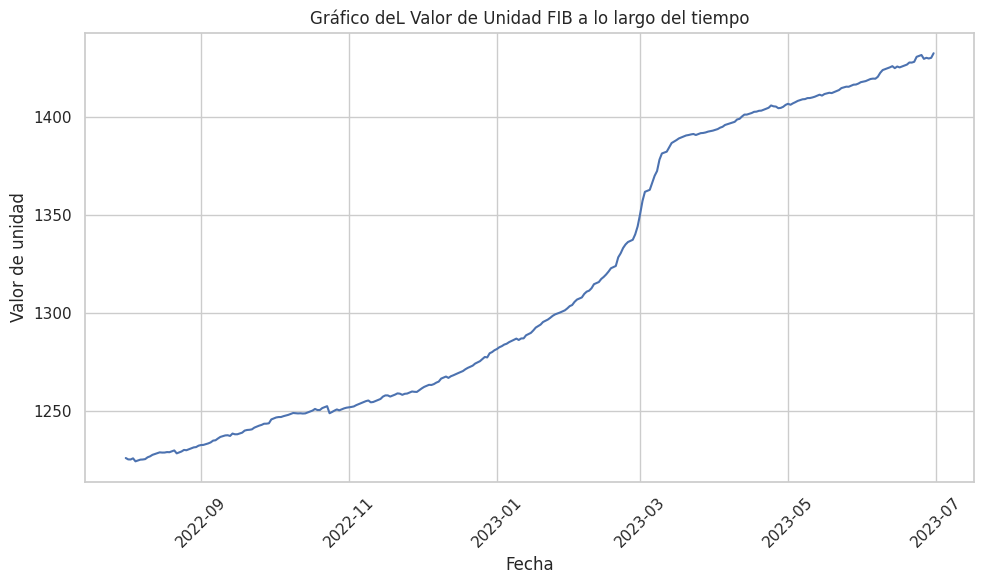

In [87]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(FIB['Fecha'], FIB['Valor de unidad'])
plt.xlabel('Fecha')
plt.ylabel('Valor de unidad')
plt.title('Gráfico deL Valor de Unidad FIB a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

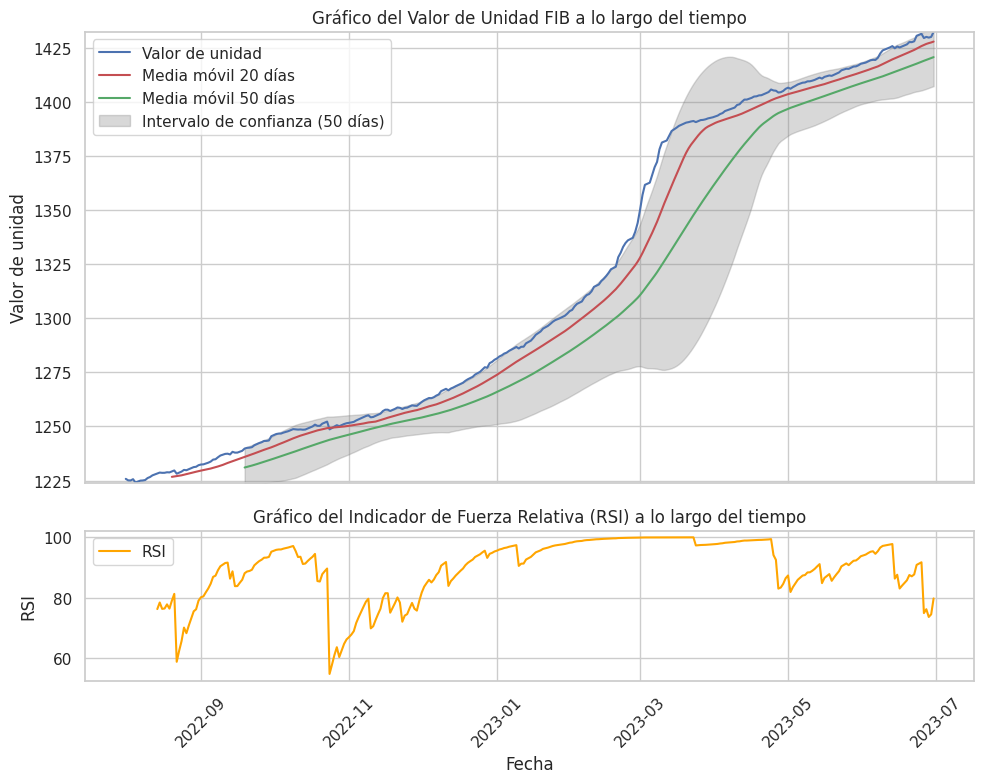

In [118]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")
# Supongamos que tienes el DataFrame FIB con las columnas 'Fecha' y 'Valor de unidad'
# Calculamos el RSI para el DataFrame FIB
dias_rsi = 14
FIB['RSI'] = momentum.RSIIndicator(FIB['Valor de unidad'], window=dias_rsi).rsi()
# Calculamos las medias móviles de 20 y 50 días
FIB['Media_movil_20'] = FIB['Valor de unidad'].rolling(window=20).mean()
FIB['Media_movil_50'] = FIB['Valor de unidad'].rolling(window=50).mean()
# Calculamos los intervalos de confianza para la media móvil de 50 días
FIB['Intervalo_sup_50'] = FIB['Media_movil_50'] + 1.96 * FIB['Valor de unidad'].rolling(window=50).std()
FIB['Intervalo_inf_50'] = FIB['Media_movil_50'] - 1.96 * FIB['Valor de unidad'].rolling(window=50).std()
# Crear una figura con dos subgráficos, uno más pequeño para el RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
# Gráfico superior (Valor de unidad, medias móviles y intervalos de confianza)
ax1.plot(FIB['Fecha'], FIB['Valor de unidad'], label='Valor de unidad', color='b')
ax1.plot(FIB['Fecha'], FIB['Media_movil_20'], label='Media móvil 20 días', color='r')
ax1.plot(FIB['Fecha'], FIB['Media_movil_50'], label='Media móvil 50 días', color='g')
ax1.fill_between(FIB['Fecha'], FIB['Intervalo_inf_50'], FIB['Intervalo_sup_50'], alpha=0.3, color='gray', label='Intervalo de confianza (50 días)')
ax1.set_ylabel('Valor de unidad')
ax1.set_title('Gráfico del Valor de Unidad FIB a lo largo del tiempo')
ax1.legend()
# Gráfico inferior (RSI)
ax2.plot(FIB['Fecha'], FIB['RSI'], label='RSI', color='orange')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('RSI')
ax2.set_title('Gráfico del Indicador de Fuerza Relativa (RSI) a lo largo del tiempo')
ax2.legend()
# Ajustar los límites del eje y en el gráfico superior para una mejor visualización
ax1.set_ylim(FIB['Valor de unidad'].min(), FIB['Valor de unidad'].max())
# Rotar las etiquetas del eje x para ambos subgráficos
plt.xticks(rotation=45)
# Ajustar los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar la figura
plt.show()

<ipython-input-107-4e7a2517d66c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDCdb_filtered['Índice base 1000'] = IDCdb_filtered['Valor de unidad'] / IDCdb_filtered.iloc[0]['Valor de unidad'] * 1000


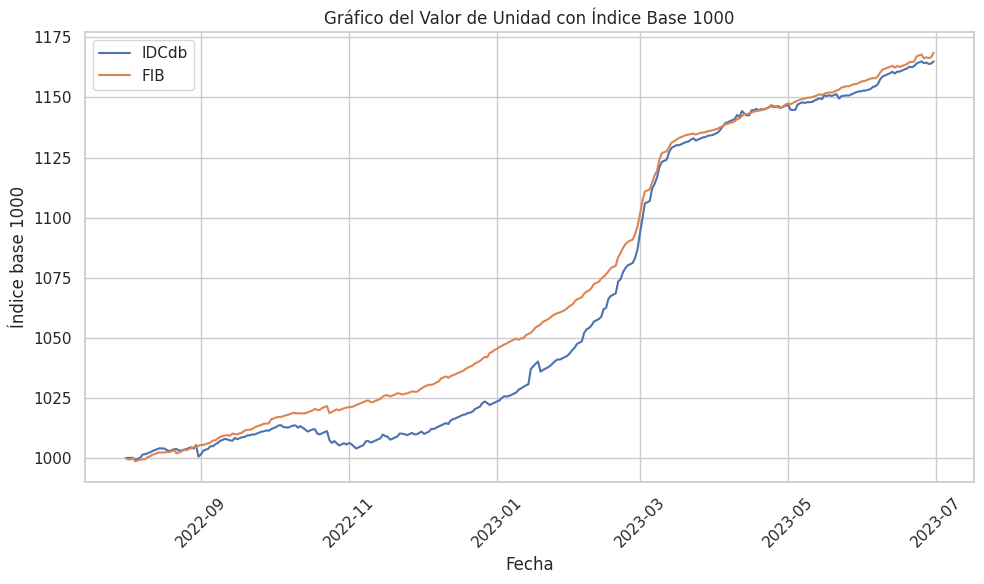

In [107]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")
# Suponiendo que tienes IDCdb y FIB como DataFrames con las columnas "Fecha" y "Valor de unidad"
# Encontrar la primera fecha común en ambos conjuntos de datos
fecha_minima = max(min(IDCdb['Fecha']), min(FIB['Fecha']))
fecha_maxima = min(max(IDCdb['Fecha']), max(FIB['Fecha']))
# Filtrar los datos desde la primera fecha común hasta la última fecha común
IDCdb_filtered = IDCdb[(IDCdb['Fecha'] >= fecha_minima) & (IDCdb['Fecha'] <= fecha_maxima)]
FIB_filtered = FIB[(FIB['Fecha'] >= fecha_minima) & (FIB['Fecha'] <= fecha_maxima)]
# Calcular el índice base 1000 para ambas series
IDCdb_filtered['Índice base 1000'] = IDCdb_filtered['Valor de unidad'] / IDCdb_filtered.iloc[0]['Valor de unidad'] * 1000
FIB_filtered['Índice base 1000'] = FIB_filtered['Valor de unidad'] / FIB_filtered.iloc[0]['Valor de unidad'] * 1000
# Trazar ambos gráficos en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(IDCdb_filtered['Fecha'], IDCdb_filtered['Índice base 1000'], label='IDCdb')
plt.plot(FIB_filtered['Fecha'], FIB_filtered['Índice base 1000'], label='FIB')
plt.xlabel('Fecha')
plt.ylabel('Índice base 1000')
plt.title('Gráfico del Valor de Unidad con Índice Base 1000')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
IDCdb_filtered['Rendimiento diario'] = IDCdb_filtered['Índice base 1000'].pct_change()
FIB_filtered['Rendimiento diario'] = FIB_filtered['Índice base 1000'].pct_change()
# Calcular la volatilidad diaria
volatilidad_diaria_IDCdb = IDCdb_filtered['Rendimiento diario'].std()
volatilidad_diaria_FIB = FIB_filtered['Rendimiento diario'].std()
# Calcular la volatilidad anualizada
dias_por_anio = 252  # Se asume que hay 252 días de negociación en un año
volatilidad_anualizada_IDCdb = volatilidad_diaria_IDCdb * (dias_por_anio ** 0.5)
volatilidad_anualizada_FIB = volatilidad_diaria_FIB * (dias_por_anio ** 0.5)

<ipython-input-89-32303524081a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDCdb_filtered['Rendimiento diario'] = IDCdb_filtered['Índice base 1000'].pct_change()


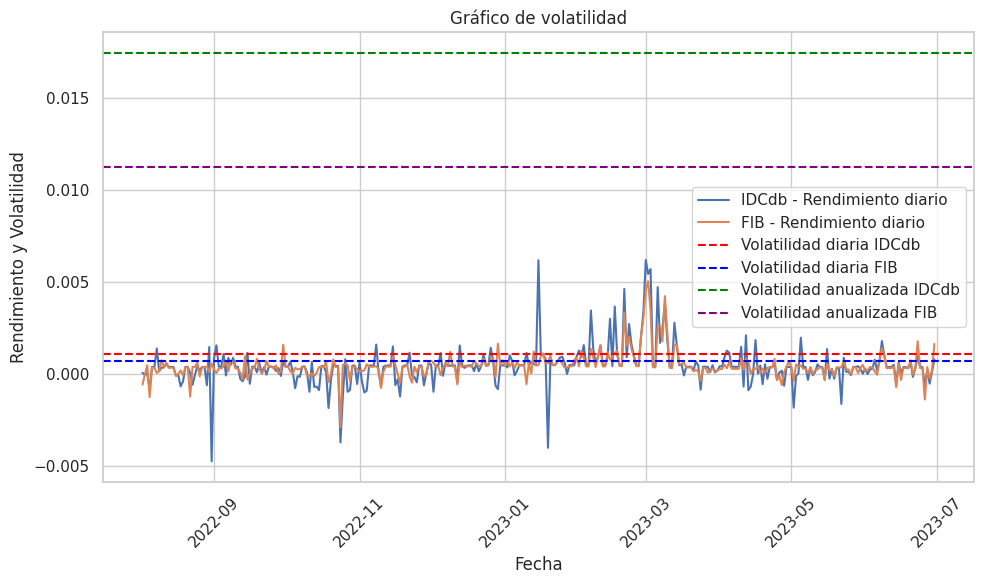

In [90]:
# Trazar el gráfico de volatilidad utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=IDCdb_filtered, x='Fecha', y='Rendimiento diario', label='IDCdb - Rendimiento diario')
sns.lineplot(data=FIB_filtered, x='Fecha', y='Rendimiento diario', label='FIB - Rendimiento diario')
plt.axhline(y=volatilidad_diaria_IDCdb, color='red', linestyle='dashed', label='Volatilidad diaria IDCdb')
plt.axhline(y=volatilidad_diaria_FIB, color='blue', linestyle='dashed', label='Volatilidad diaria FIB')
plt.axhline(y=volatilidad_anualizada_IDCdb, color='green', linestyle='dashed', label='Volatilidad anualizada IDCdb')
plt.axhline(y=volatilidad_anualizada_FIB, color='purple', linestyle='dashed', label='Volatilidad anualizada FIB')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento y Volatilidad')
plt.title('Gráfico de volatilidad')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
# Guardar los datos en un archivo Excel
with pd.ExcelWriter('/content/datos_graficos.xlsx') as writer:
    IDCdb_filtered.to_excel(writer, sheet_name='IDCdb_filtered', index=False)
    FIB_filtered.to_excel(writer, sheet_name='FIB_filtered', index=False)